In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sp
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [40]:
df=pd.read_csv("delivery_time.csv")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

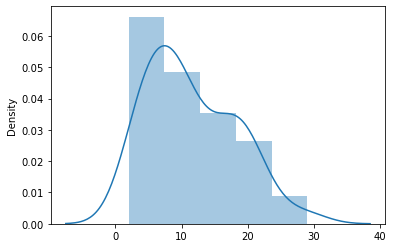

In [34]:
sp.distplot(df)

# Log transformation of the data

In [28]:
df_log=np.log(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

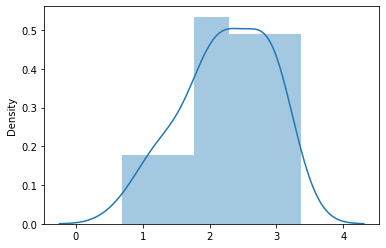

In [82]:
sp.distplot(df_log)

# Squareroot transformation

In [35]:
df_sqrt=np.sqrt(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

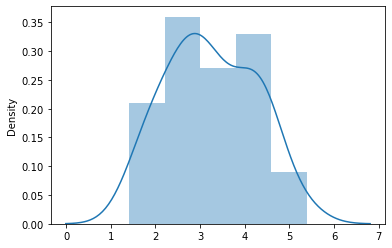

In [37]:
sp.distplot(df_sqrt)

# Eda and Visualisation

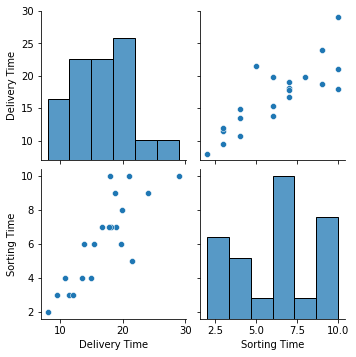

In [10]:
sp.pairplot(df)

# Checking for null values


In [35]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [36]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1be8ee2d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1be8ee2d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be8ee1fee0>,
 'medians': [<matplotlib.lines.Line2D at 0x1be8ee37130>,
 'fliers': [<matplotlib.lines.Line2D at 0x1be8ee374c0>,
 'means': []}

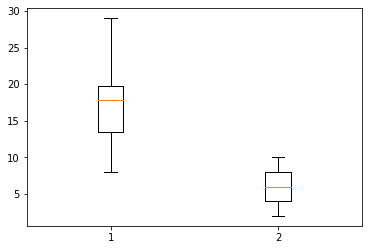

In [38]:
plt.boxplot(df[["Delivery Time","Sorting Time"]])#boxplot to check for outliers

# Train Data

In [68]:
df_train=df_log.head(10)

In [69]:
y=df_train["Delivery Time"]
x=df_train["Sorting Time"]

In [70]:
model=LinearRegression()

In [71]:
model.fit(x[:,np.newaxis],y)

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/592865538.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:,np.newaxis],y)


LinearRegression()

In [72]:
pred=model.predict(x[:,np.newaxis])

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/2169191451.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred=model.predict(x[:,np.newaxis])


In [85]:
score1=model.score(x[:,np.newaxis],y)
score1

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/2008921735.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score1=model.score(x[:,np.newaxis],y)


0.758094290398369

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/2411484246.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(x[:,np.newaxis],pred)


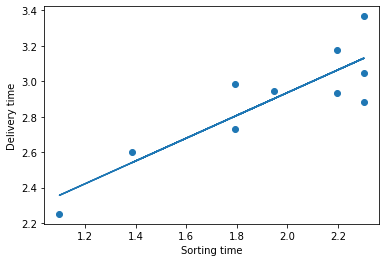

In [74]:
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.scatter(x,y)
plt.plot(x[:,np.newaxis],pred)

# Test data

In [75]:
df_test=df_log.tail(10)
df_test

,Delivery Time,Sorting Time
11,2.374906,1.386294
12,2.814210,1.945910
13,2.442347,1.098612
14,2.487404,1.098612
15,2.700018,1.386294
16,2.621039,1.791759
17,2.896464,1.945910
18,2.079442,0.693147
19,2.880882,1.945910
20,3.068053,1.609438


In [76]:
model1=LinearRegression()

In [77]:
b=df_test["Delivery Time"]
a=df_test["Sorting Time"]

In [78]:
model1.fit(a[:,np.newaxis],b)

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/1406086641.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(a[:,np.newaxis],b)


LinearRegression()

In [79]:
pred=model1.predict(a[:,np.newaxis])
pred

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/1605633144.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred=model1.predict(a[:,np.newaxis])


array([2.57772811, 2.89416952, 2.41505486, 2.41505486, 2.57772811,
       2.80700318, 2.89416952, 2.18577979, 2.89416952, 2.70390729])

In [84]:
score2=model1.score(a[:,np.newaxis],b)
score2

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/526646211.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score2=model1.score(a[:,np.newaxis],b)


0.686398925246295

C:\Users\DHAVAL\AppData\Local\Temp/ipykernel_14264/2244186321.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(a[:,np.newaxis],pred)


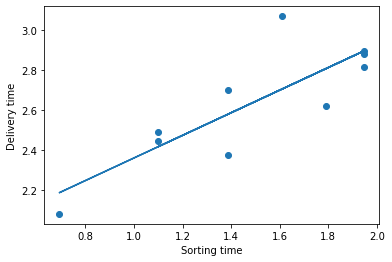

In [81]:
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.scatter(a,b)
plt.plot(a[:,np.newaxis],pred)

# Score

In [86]:
print("The best score of SLR model for Train dataset using log transformation is:",score1)
print("The best score of SLR model for Test dataset using log transformation is:",score2)

The best score of SLR model for Train dataset using log transformation is: 0.758094290398369
The best score of SLR model for Test dataset using log transformation is: 0.686398925246295
